# ------------ Padding & Strides in CNN  -------------------

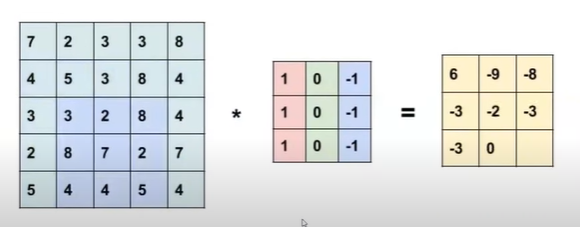

# Why is Padding Needed in Convolutional Neural Networks (CNNs)?

Padding is essential in Convolutional Neural Networks (CNNs) for several key reasons. Without it, applying convolutional operations would lead to a reduction in the size of the feature maps at each layer, causing information loss, especially near the boundaries of the input. Below are the main reasons padding is used:

### 1. Preserve Spatial Dimensions of Feature Maps
- **Problem Without Padding**: Each convolution operation reduces the spatial dimensions (height and width) of the input feature map. For example, a \(5 \times 5\) input with a \(3 \times 3\) filter will produce a \(3 \times 3\) output feature map if no padding is used.
- **Solution with Padding**: By using padding, we can preserve the spatial dimensions of the output feature map to match the input dimensions. For example, using `same` padding (adding one pixel border on all sides) allows a \(5 \times 5\) input with a \(3 \times 3\) filter to produce a \(5 \times 5\) output feature map.

### 2. Prevent Loss of Information at the Edges
- **Problem Without Padding**: Without padding, pixels at the edges or corners are used fewer times in convolutions compared to pixels in the center. This leads to less information being learned from edge pixels, which can result in degraded performance, especially for tasks like image classification and object detection, where edge information can be crucial.
- **Solution with Padding**: Adding padding ensures that the kernel can cover edge and corner pixels multiple times, preventing information loss and enabling the network to learn better representations.

### 3. Control the Output Feature Map Size
- **Problem Without Padding**: Each convolutional layer without padding reduces the size of the output feature map. This is problematic when constructing deep networks with many layers, as the feature map can quickly shrink to a very small size, making it difficult to capture complex features and patterns.
- **Solution with Padding**: Using padding, the size of the output feature map can be controlled. For example, by using `same` padding, the output size can be kept equal to the input size, allowing deep networks to be built without shrinking the feature map too much.

### 4. Maintain Symmetry and Alignment in the Network
- **Problem Without Padding**: Without padding, as the size of the feature map decreases, the receptive field of the network might not be symmetric around each pixel. This means the network might learn asymmetrical features, which can impact performance in tasks requiring high spatial resolution.
- **Solution with Padding**: Padding ensures that each pixel in the output has a symmetric and well-aligned receptive field, enabling the network to learn more accurate and consistent features across layers.

### 5. Enable Strided Convolutions Without Excessive Reduction in Output Size
- **Problem Without Padding**: When using strides greater than 1, the feature map size reduces significantly with each convolutional operation. Without padding, this reduction can be too severe, limiting the network's ability to learn fine-grained details.
- **Solution with Padding**: By adding padding, we can use strided convolutions (for downsampling or reducing feature map size) without overly reducing the output size. This helps maintain a balance between feature extraction and output size control.

### 6. Facilitate Easy Network Design and Architecture
- **Problem Without Padding**: Without padding, calculating the output dimensions and designing architectures becomes complex, especially when combining multiple convolutional layers.
- **Solution with Padding**: Using padding simplifies the calculation of dimensions and makes it easier to design and stack multiple convolutional layers while maintaining control over the network's architecture.

### Example
Consider a \(5 \times 5\) input image and a \(3 \times 3\) kernel (filter) with stride 1:

1. **Without Padding (`valid`)**:
   - Output size: \(3 \times 3\).
   - **Reason**: The kernel only slides over the inner \(3 \times 3\) region of the image, losing 2 rows and 2 columns of information from the borders.

2. **With `same` Padding**:
   - Output size: \(5 \times 5\).
   - **Reason**: Padding of size 1 (adding 1 row and 1 column around the image) ensures that the kernel can cover the entire \(5 \times 5\) region without reducing the output size.

### Summary
Padding is crucial for:
- Preserving spatial dimensions.
- Preventing loss of border information.
- Controlling the output size.
- Maintaining symmetry and alignment.
- Simplifying network design.

Using padding effectively allows CNNs to extract better features from input images, making them more powerful for various computer vision tasks.


# Padding in Convolutional Neural Networks (CNN)



### Definition
Padding refers to adding extra pixels around the border of the input image or feature map before applying a convolution operation. It helps control the spatial dimensions of the output feature map and preserves information at the borders of the input.

### Types of Padding

### 1. **Valid Padding (`padding='valid'`)**
- No padding is added to the input image.
- This results in a reduction of the spatial dimensions of the output feature map compared to the input.
- **Formula for output dimensions**:
  
 $$
\text{Output Height (H)} = \frac{(H_{\text{input}} - \text{Kernel Height})}{\text{Stride}} + 1
$$

$$
\text{Output Width (W)} = \frac{(W_{\text{input}} - \text{Kernel Width})}{\text{Stride}} + 1
$$


### 2. **Same Padding (`padding='same'`)**
- Padding is added such that the output feature map has the same spatial dimensions (height and width) as the input.
- This ensures that the convolutional layer does not reduce the size of the feature map.
- **Formula for calculating the padding size**:
$$
\text{Padding} = \frac{\text{Kernel Size} - 1}{2}
$$


### 3. **Full Padding**
- Padding is added to increase the size of the input such that the convolution can cover all possible locations.
- The padding size is typically larger compared to same padding, resulting in an output feature map that is larger than the input.

## Why Padding is Used?
1. **Preserve Spatial Dimensions**: When same padding is used, the height and width of the feature map remain the same after convolution, making it easier to maintain information across multiple layers.

2. **Prevent Information Loss**: Without padding, the borders of the image are considered fewer times compared to the center, leading to loss of border information.

3. **Control Output Size**: By using appropriate padding, the output size can be controlled to match the desired dimensions.

### Example
If we have a \( 5 \times 5 \) image and apply a \( 3 \times 3 \) kernel with valid padding, the output size will be reduced to \( 3 \times 3 \). Using same padding will keep the output size as \( 5 \times 5 \).


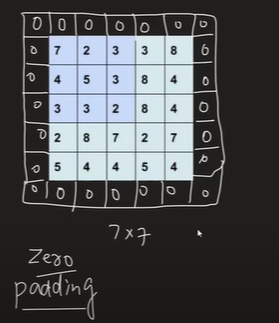

### Formula for Padding
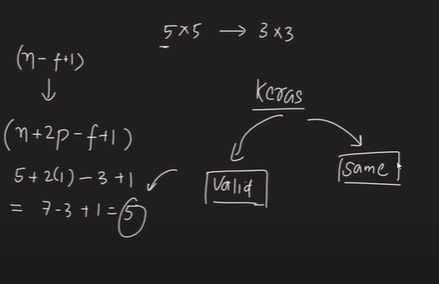

#### Convolution Operation after Padding

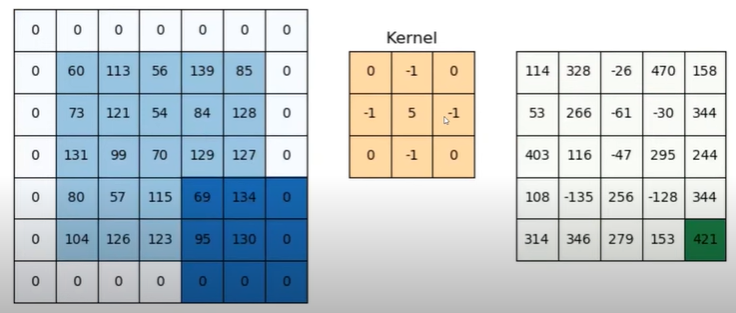

# Strides

### Strides in Convolutional Neural Networks (CNN)

### Definition
**Strides** refer to the number of pixels by which the kernel (or filter) moves across the input image or feature map during convolution. By default, a stride of 1 is used, meaning the kernel shifts one pixel at a time.

### Impact of Strides
- **Strides > 1**: This causes the kernel to skip some pixels, resulting in a reduced output size compared to the input.
- **Strides = 1**: This means the kernel moves one pixel at a time, covering all possible locations, and the output size is determined solely by the padding.

### Formula for Output Dimensions
Given an input image of size $ H_{\text{input}} \times W_{\text{input}} $
, a kernel of size $ K_H \times K_W $, padding $ P $, and stride $ S $, the output dimensions can be calculated as:

$$
\text{Output Height (H)} = \left\lfloor \frac{(H_{\text{input}} - K_H + 2P)}{S} \right\rfloor + 1
$$

$$
\text{Output Width (W)} = \left\lfloor \frac{(W_{\text{input}} - K_W + 2P)}{S} \right\rfloor + 1
$$


### Why Use Strides?
- **Reduce Computational Cost**: Larger strides reduce the size of the output feature map, leading to fewer parameters and computations in subsequent layers.
- **Control Output Size**: By adjusting the stride, the size of the output feature map can be reduced or increased, providing flexibility in the architecture of the CNN.

### Example
If we have a **7*7** image and apply a **3×3** kernel with a stride of 1 , the kernel will move one pixels at a time, resulting in an output size of **3*3**.


### Formula for Output Dimensions
### Output Height (H):
$$
\text{Output Height (H)} = H_{\text{input}} - K_H + 1
$$
### Output Width (W):
$$
\text{Output Width (W)} = W_{\text{input}} - K_W + 1
$$
### Given Values
```python 
Input matrix 7*7 and kernal(filter) is 3*3 
```
### Calculating Output Dimensions
#### Output Height (H):
$$
\text{Output Height (H)} = 7 - 3 + 1 = 5
$$
#### Output Width (W):
$$
\text{Output Width (W)} = 7 - 3 + 1 = 5
$$
## Output Feature Map
Thus, the output feature map dimensions will be:
$$
\text{Output Feature Map Size} = 5 \times 5
$$


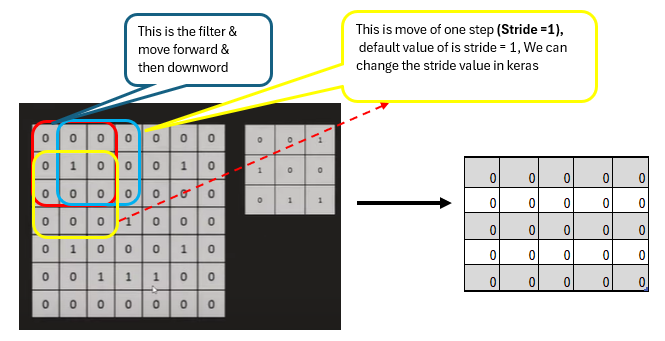

### If we are choosing Stride = 2

### Formula for Output Dimensions
### Output Height (H):
$$
\text{Output Height (H)} = \left(( H_{\text{input}} - K_H \right) \div \text{Stride}) + 1
$$
### Output Width (W):
$$
\text{Output Width (W)} = \left((W_{\text{input}} - K_W \right) \div \text{Stride}) + 1
$$
### Given Values
```python 
Input matrix: 7*7, Kernel (filter): 3*3, Stride: 2
```
### Calculating Output Dimensions
#### Output Height (H):
$$
\text{Output Height (H)} = (7−3)÷2+1=(4÷2)+1=2+1=3
$$
#### Output Width (W):
$$
\text{Output Width (W)} = (7−3)÷2+1=(4÷2)+1=2+1=3
$$
### Output Feature Map
Thus, the output feature map dimensions will be:
$$
\text{Output Feature Map Size} = 3*3
\$$

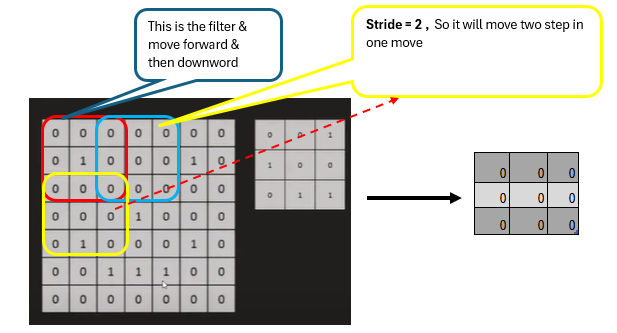

### Issue with Padding

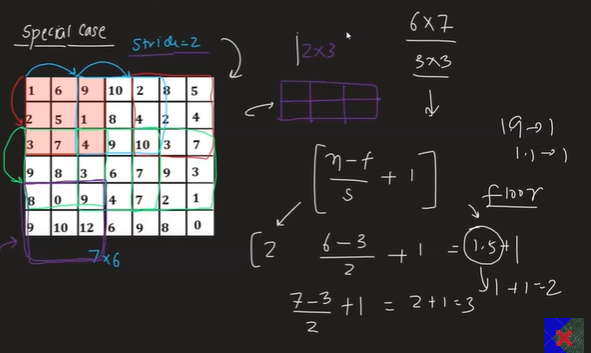

### Why Strides Are Required?

Strides play a crucial role in the functioning of convolutional neural networks (CNNs). Here are the key reasons:

1. **Extraction of High-Level Features**:
   - Strides allow the network to skip certain pixels when applying the convolutional kernel. This helps the model focus on larger, high-level features in the input data instead of getting bogged down in fine details. By using larger strides, the network can learn more abstract representations, which are essential for tasks like image classification and object detection.

2. **Computational Efficiency**:
   - By using strides greater than one, the number of calculations performed during the convolution operation is reduced. This leads to faster processing times and lower resource consumption. Strides help in downsampling the feature map, making it easier to manage and reducing the overall computational load on the network.

### Additional Benefits

3. **Control Over Output Dimensions**:
   - Strides allow for control over the dimensions of the output feature maps. By adjusting the stride, you can manipulate the size of the output, which can be crucial for certain applications or architectures.

4. **Reduced Risk of Overfitting**:
   - Larger strides result in smaller feature maps, which can help in reducing the complexity of the model. This simplification can mitigate the risk of overfitting, especially when dealing with limited training data.

5. **Flexibility in Architecture Design**:
   - Strides provide flexibility in designing the architecture of a CNN. Depending on the specific requirements of the task at hand, the stride can be adjusted to achieve the desired balance between detail and abstraction.

### Conclusion

In summary, strides are essential for extracting high-level features while maintaining computational efficiency in convolutional neural networks. They enable flexibility in network design and help manage the trade-off between feature detail and model complexity.
